## Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.2f}'.format
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import joblib  # For saving the trained scaler

pd.options.display.float_format = '{:.2f}'.format
%matplotlib inline

##1. Importação dos dados (0 pontos...)


In [ ]:
df = pd.read_csv('laptop_price - dataset.csv')
df.head(5)

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.30,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.30,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.30,1440x900,Intel,Core i5,1.80,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.60,Full HD 1920x1080,Intel,Core i5 7200U,2.50,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.40,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.70,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.30,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.10,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


##2. Análise Descritiva (2 pontos)

In [ ]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution',
       'CPU_Company', 'CPU_Type', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Memory',
       'GPU_Company', 'GPU_Type', 'OpSys', 'Weight (kg)', 'Price (Euro)'],
      dtype='object')

In [ ]:
df.shape

(1275, 15)

In [ ]:
df.isna().sum().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   object 
 1   Product              1275 non-null   object 
 2   TypeName             1275 non-null   object 
 3   Inches               1275 non-null   float64
 4   ScreenResolution     1275 non-null   object 
 5   CPU_Company          1275 non-null   object 
 6   CPU_Type             1275 non-null   object 
 7   CPU_Frequency (GHz)  1275 non-null   float64
 8   RAM (GB)             1275 non-null   int64  
 9   Memory               1275 non-null   object 
 10  GPU_Company          1275 non-null   object 
 11  GPU_Type             1275 non-null   object 
 12  OpSys                1275 non-null   object 
 13  Weight (kg)          1275 non-null   float64
 14  Price (Euro)         1275 non-null   float64
dtypes: float64(4), int64(1), object(10)
me

<Axes: >

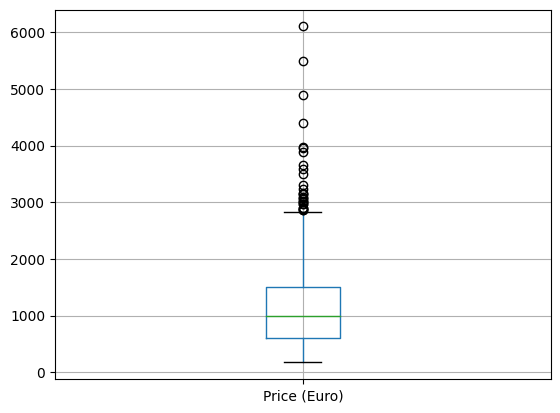

In [ ]:
df[['Price (Euro)']].boxplot()

In [ ]:
df.describe()

,Inches,CPU_Frequency (GHz),RAM (GB),Weight (kg),Price (Euro)
count,1275.00,1275.00,1275.00,1275.00,1275.00
mean,15.02,2.30,8.44,2.04,1134.97
std,1.43,0.50,5.10,0.67,700.75
min,10.10,0.90,2.00,0.69,174.00
25%,14.00,2.00,4.00,1.50,609.00
50%,15.60,2.50,8.00,2.04,989.00
75%,15.60,2.70,8.00,2.31,1496.50
max,18.40,3.60,64.00,4.70,6099.00


In [ ]:
# achamos estranho o valor minimo no describe ter 0.90 de frequência e estamos verificando se faz sentido mesmo
df[df['CPU_Frequency (GHz)'] < 1.1]['CPU_Frequency (GHz)'].count()

3

In [ ]:
df[df['CPU_Frequency (GHz)'] < 1.1]


,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
592,Dell,Inspiron 3179,2 in 1 Convertible,11.60,Touchscreen 1366x768,Intel,Core M 7Y30,1.00,4,128GB SSD,Intel,HD Graphics 615,Windows 10,1.39,603.00
697,Asus,Chromebook Flip,2 in 1 Convertible,12.50,Full HD / Touchscreen 1920x1080,Intel,Core M M3-6Y30,0.90,4,64GB Flash Storage,Intel,HD Graphics 515,Chrome OS,1.20,669.00
1261,Asus,ZenBook UX305CA-UBM1,Ultrabook,13.30,IPS Panel Full HD 1920x1080,Intel,Core M 6Y30,0.90,8,512GB SSD,Intel,HD Graphics 515,Windows 10,1.20,729.00


array([[<Axes: title={'center': 'Price (Euro)'}>]], dtype=object)

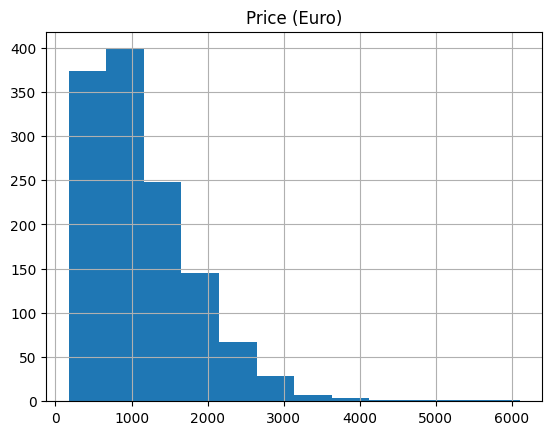

In [ ]:
df[['Price (Euro)']].hist(bins=12)

<ipython-input-650-36bd8ae3158e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Price (Euro)"],kde=True)


<Axes: xlabel='Price (Euro)', ylabel='Density'>

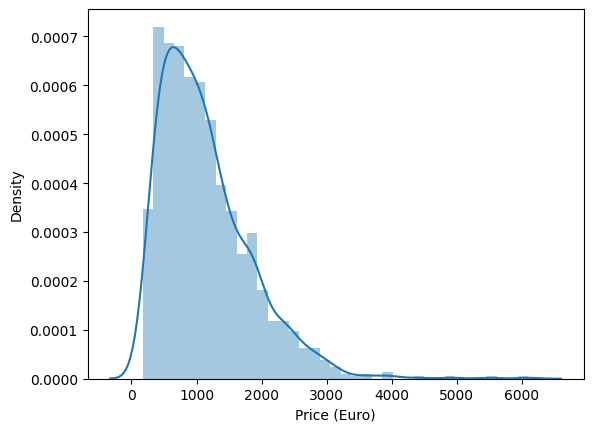

In [ ]:
sns.distplot(df["Price (Euro)"],kde=True)

In [ ]:
df.loc[df["Price (Euro)"].idxmax()]

,196
Company,Razer
Product,Blade Pro
TypeName,Gaming
Inches,17.30
ScreenResolution,4K Ultra HD / Touchscreen 3840x2160
CPU_Company,Intel
CPU_Type,Core i7 7820HK
CPU_Frequency (GHz),2.90
RAM (GB),32
Memory,1TB SSD


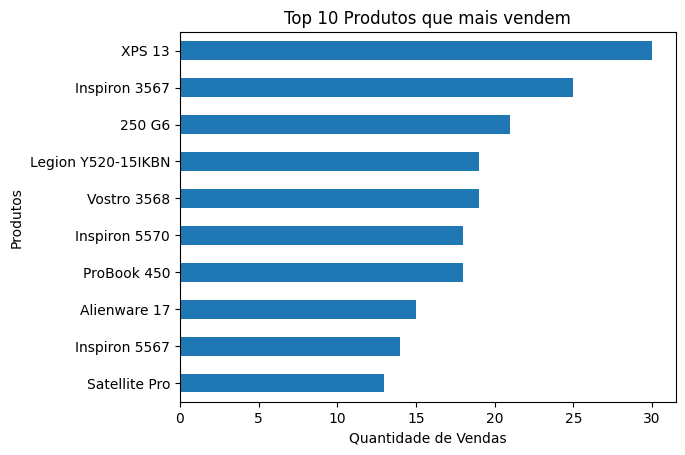

In [ ]:
# observando as 10 produtos que mais vendem
df["Product"].value_counts()[:10].sort_values(ascending=True).plot(kind="barh")
plt.title('Top 10 Produtos que mais vendem')
plt.xlabel('Quantidade de Vendas')
plt.ylabel('Produtos')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


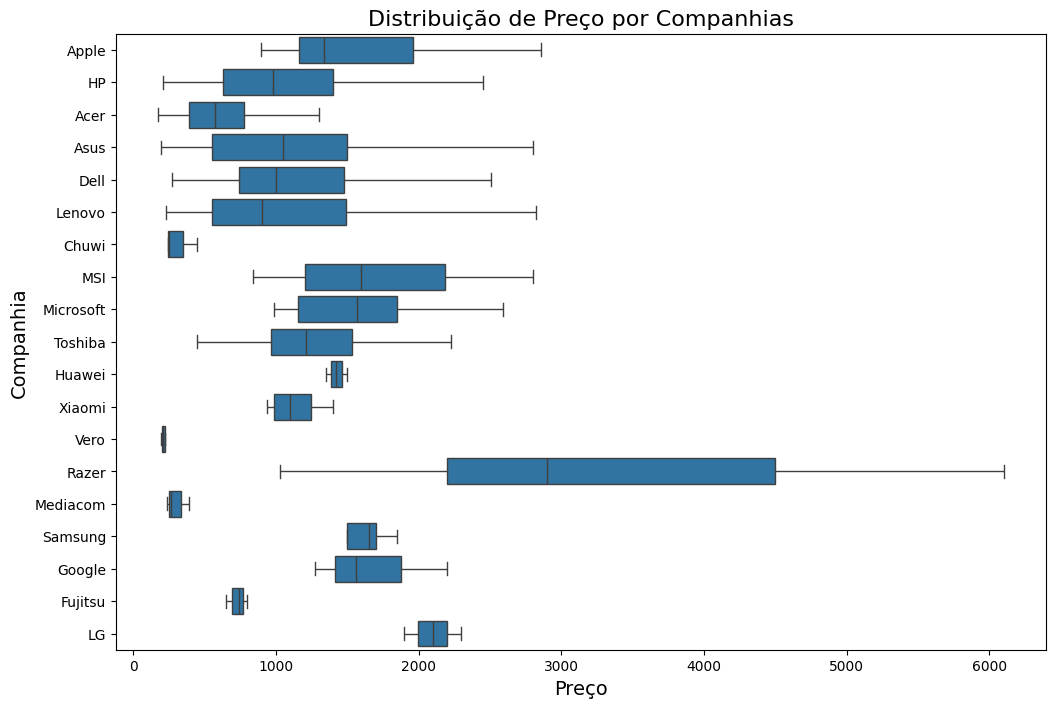

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(y="Company", x="Price (Euro)", data=df, showfliers=False)
plt.title('Distribuição de Preço por Companhias', fontsize=16)
plt.xlabel('Preço', fontsize=14)
plt.ylabel('Companhia', fontsize=14)

plt.show()

##3. Correlações (1 ponto)

In [ ]:
df_numericas = df[['Inches', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Weight (kg)', 'Price (Euro)' ]]

<Axes: >

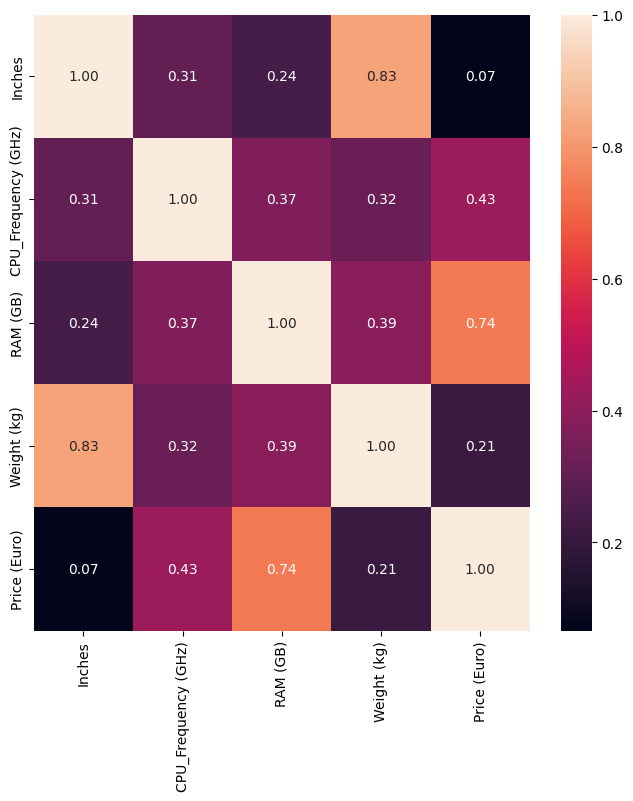

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(df_numericas.corr(), annot=True, fmt=".2f")

##4. Modelagem: Baseline (2 pontos)


In [ ]:
features= df[['Inches', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Weight (kg)']]

In [ ]:
#Target
y = df['Price (Euro)']

In [ ]:
X = features

In [ ]:
#dividir dados entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [ ]:
#instanciar modelo
Linear_model= LinearRegression()

In [ ]:
#treinar o modelo
Linear_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
#fazer a predição
predictions = Linear_model.predict(X_test)

In [ ]:
predictions[0:10]

array([1246.59101226, 3245.79689814,  578.69111749,  897.37489491,
       1102.22251701,  928.15979595, 1149.35094986, 1660.59310457,
       1136.11789143, 1773.16213464])

##5. Métricas: MAPE e R2 (0,5 ponto)

In [ ]:
# Calculate MAPE (Mean Absolute Percentage Error)
mape1 = np.mean(np.abs((y_test - predictions) / y_test)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape1:.2f}%")

Mean Absolute Percentage Error (MAPE): 35.46%


In [ ]:
#coeficiente de determinação
r2_var1 = r2_score(y_test,predictions)
print(f"R2: {r2_var1:.2f}")

R2: 0.61


##6. Feature Engineering: Novas colunas e/ou Standarização (2 pontos)


In [ ]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution',
       'CPU_Company', 'CPU_Type', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Memory',
       'GPU_Company', 'GPU_Type', 'OpSys', 'Weight (kg)', 'Price (Euro)'],
      dtype='object')

In [ ]:
# já observamos todas as outras colunas exceto a de OpSys, na tentativa de identificar uma possível categoria para utilizar onehotenconding
df['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

- Entendemos que onehotenconding não faz muito sentido, visto que não temos uma coluna categórica para fazer uma comparação entre duas variaveis

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Inicializar o LabelEncoder
le = LabelEncoder()

# Aplicar o LabelEncoder na coluna 'Genres'
df['Company_encoded'] = le.fit_transform(df['Company'])
df['Memory_encoded'] = le.fit_transform(df['Memory'])
df['OpSys_encoded'] = le.fit_transform(df['OpSys'])
df['Cpu_encoded'] = le.fit_transform(df['CPU_Type'])
df['Gpu_encoded'] = le.fit_transform(df['GPU_Type'])
print("\nDataFrame com Label Encoding:")
df


DataFrame com Label Encoding:


,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro),Company_encoded,Memory_encoded,OpSys_encoded,Cpu_encoded,Gpu_encoded
0,Apple,MacBook Pro,Ultrabook,13.30,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.30,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69,1,4,8,40,56
1,Apple,Macbook Air,Ultrabook,13.30,1440x900,Intel,Core i5,1.80,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94,1,2,8,40,50
2,HP,250 G6,Notebook,15.60,Full HD 1920x1080,Intel,Core i5 7200U,2.50,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00,7,16,4,46,52
3,Apple,MacBook Pro,Ultrabook,15.40,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.70,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45,1,29,8,54,76
4,Apple,MacBook Pro,Ultrabook,13.30,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.10,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60,1,16,8,40,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.00,IPS Panel Full HD / Touchscreen 1920x1080,Intel,Core i7 6500U,2.50,4,128GB SSD,Intel,HD Graphics 520,Windows 10,1.80,638.00,10,4,5,55,46
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.30,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel,Core i7 6500U,2.50,16,512GB SSD,Intel,HD Graphics 520,Windows 10,1.30,1499.00,10,29,5,55,46
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.00,1366x768,Intel,Celeron Dual Core N3050,1.60,2,64GB Flash Storage,Intel,HD Graphics,Windows 10,1.50,229.00,10,35,5,20,39
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.60,1366x768,Intel,Core i7 6500U,2.50,6,1TB HDD,AMD,Radeon R5 M330,Windows 10,2.19,764.00,7,10,5,55,88


In [ ]:
df.describe()

,Inches,CPU_Frequency (GHz),RAM (GB),Weight (kg),Price (Euro),Company_encoded,Memory_encoded,OpSys_encoded,Cpu_encoded,Gpu_encoded
count,1275.00,1275.00,1275.00,1275.00,1275.00,1275.00,1275.00,1275.00,1275.00,1275.00
mean,15.02,2.30,8.44,2.04,1134.97,6.46,16.29,4.81,50.25,47.28
std,1.43,0.50,5.10,0.67,700.75,4.10,7.94,1.03,16.98,26.03
min,10.10,0.90,2.00,0.69,174.00,0.00,0.00,0.00,0.00,0.00
25%,14.00,2.00,4.00,1.50,609.00,4.00,10.00,5.00,41.00,28.00
50%,15.60,2.50,8.00,2.04,989.00,7.00,16.00,5.00,52.00,46.00
75%,15.60,2.70,8.00,2.31,1496.50,10.00,23.00,5.00,62.00,52.00
max,18.40,3.60,64.00,4.70,6099.00,18.00,38.00,8.00,92.00,105.00


In [ ]:
df_numericas = df[['Inches', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Weight (kg)','Company_encoded', 'Price (Euro)', 'Memory_encoded', 'Cpu_encoded', 'Gpu_encoded', 'OpSys_encoded' ]]

<Axes: >

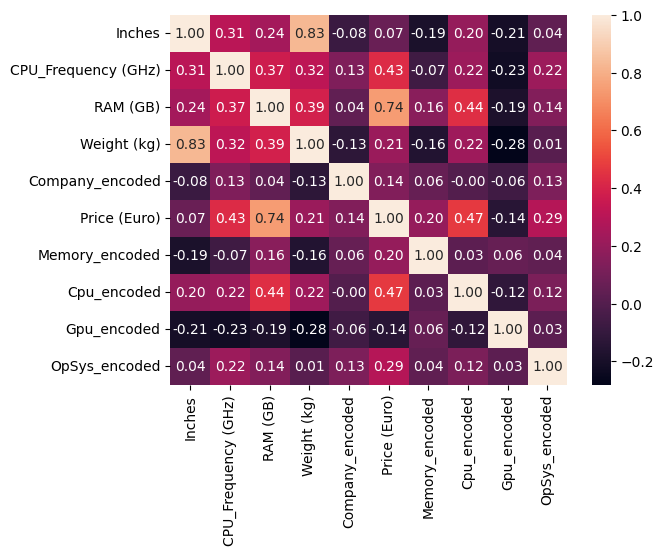

In [ ]:
sns.heatmap(df_numericas.corr(), annot=True, fmt=".2f")

In [ ]:
features = df[['CPU_Frequency (GHz)', 'RAM (GB)','Company_encoded', 'Memory_encoded', 'Cpu_encoded', 'Gpu_encoded', 'OpSys_encoded']]

In [ ]:
#Target
y = df['Price (Euro)']

In [ ]:
X = features

In [ ]:
#dividir dados entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.fit_transform(X_test)

##7. Modelagem: Modelo Melhorado (2 pontos)

In [ ]:
#instanciar modelo
Linear_model = LinearRegression()

In [ ]:
Linear_model.fit(X_train_scaled,y_train)

LinearRegression()

In [ ]:
#fazer a predição
predictions = Linear_model.predict(X_test_scaled)

In [ ]:
predictions[0:10]

array([1156.57357436, 3498.75150447,  605.6349661 ,  507.9321323 ,
       1114.02809745,  698.17818366, 1290.50971463, 1945.64961778,
       1201.67541978, 2029.70651082])

##8. Métricas: MAPE e R2 (0,5 ponto)


In [ ]:
# Calculate MAPE (Mean Absolute Percentage Error)
mape2 = np.mean(np.abs((y_test - predictions) / y_test)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape2:.2f}%")

Mean Absolute Percentage Error (MAPE): 34.00%


In [ ]:
#comparando o resultado do primerio MAPE com o segundo, com o modelo melhorado
print(f"MAPE_var1: {mape1:.2f}%")
print(f"MAPE_var2: {mape2:.2f}%")

MAPE_var1: 35.46%
MAPE_var2: 34.00%


In [ ]:
#coeficiente de determinação
r2_var2 = r2_score(y_test,predictions)
print(f"R2: {r2_var2:.2f}")

R2: 0.65


In [ ]:
#comparando a evolouão após a melhoria do modelo com featureEngineering usando labelEnconding e StanderScaler
print(f"R2_var1: {r2_var1:.2f}")
print(f"R2_var2: {r2_var2:.2f}")

R2_var1: 0.61
R2_var2: 0.65
